**Assignment 2 (AI-613 AMLMDA-EL2) RollNo_25201317**

**Q1) Analyze customer data from a telecom provider and build machine learning models to
predict churn. Dataset: Telco Customer Churn with 7,043 customer records.**

[0 1 0 ... 0 0 0]
[0.    0.69  0.06  ... 0.155 0.08  0.005]
Classification Report:


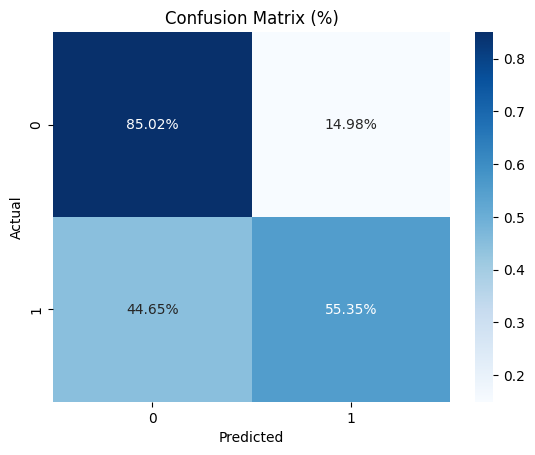

ROC Curve + AUC with Thresholds


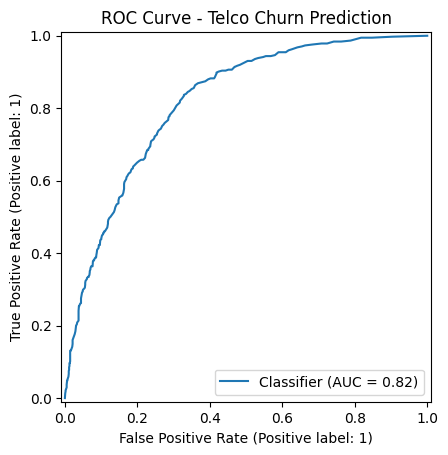

Precision-Recall Curve


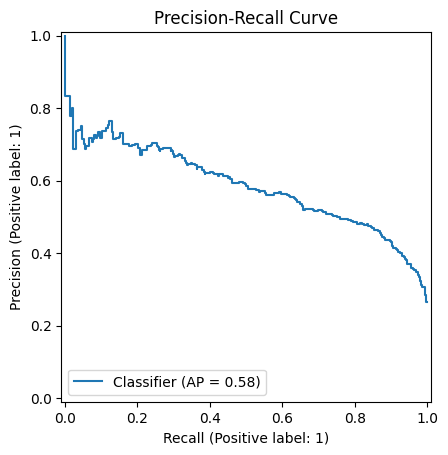

Feature Importance


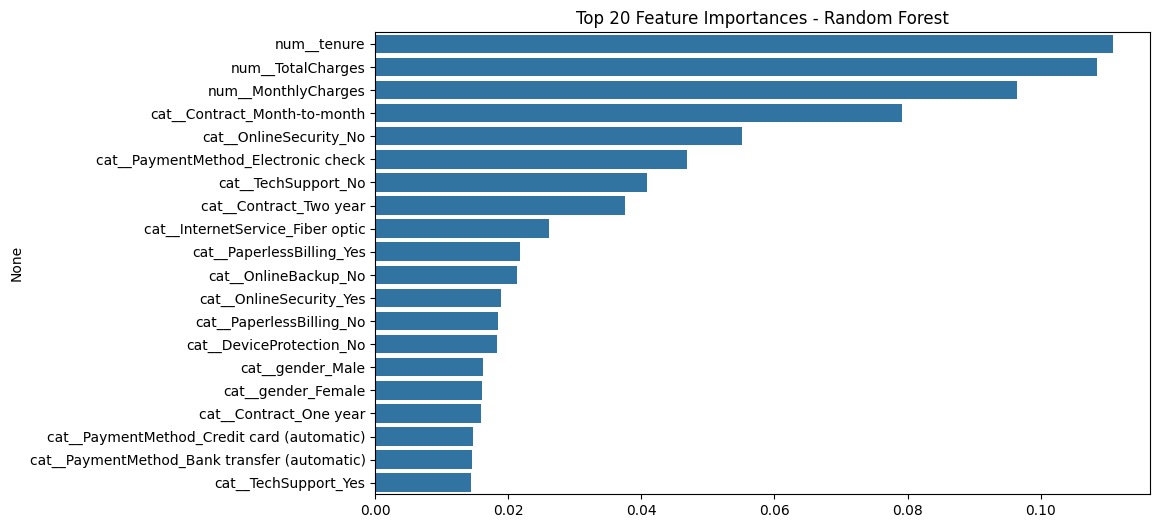

Classification Metrics by Threshold
Threshold: 0.3
Precision: 0.49312714776632305
Recall: 0.767379679144385
F1-score: 0.600418410041841
------------------------------
Threshold: 0.5
Precision: 0.5667574931880109
Recall: 0.5561497326203209
F1-score: 0.5614035087719298
------------------------------
Threshold: 0.7
Precision: 0.6456310679611651
Recall: 0.35561497326203206
F1-score: 0.4586206896551724
------------------------------


In [24]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

path = kagglehub.dataset_download("blastchar/telco-customer-churn")
DATA_PATH = f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv"
RANDOM_STATE = 42
df = pd.read_csv(DATA_PATH)
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

X = df.drop(columns=['Churn'])
y = df['Churn']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)])
preproc = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

X_train_prep = preproc.fit_transform(X_train)
X_test_prep = preproc.transform(X_test)

sm = SMOTE(random_state=RANDOM_STATE)
X_res, y_res = sm.fit_resample(X_train_prep, y_train)

clf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test_prep)
y_proba = clf.predict_proba(X_test_prep)[:,1]

print(y_pred)
print(y_proba)
print("Classification Report:")
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()
print("ROC Curve + AUC with Thresholds")
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Telco Churn Prediction")
plt.show()
print("Precision-Recall Curve")
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve")
plt.show()
print("Feature Importance")
importances = clf.feature_importances_
feature_names = preproc.get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()
print("Classification Metrics by Threshold")
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.5, 0.7]
for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    print(f"Threshold: {t}")
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print("F1-score:", f1_score(y_test, y_pred_thresh))
    print("-"*30)

**Q2) Apply parallel tree boosting algorithms (such as XGBoost, LightGBM, or CatBoost) to a
real-world dataset to predict customer default behavior. Dataset: UCI Credit Card Default
Dataset with 30,000 records.**

Path to dataset files: C:\Users\ssinh\.cache\kagglehub\datasets\uciml\default-of-credit-card-clients-dataset\versions\1
Accuracy: 0.8000
Precision: 0.5636
Recall: 0.4243
F1-score: 0.4841
AUC: 0.7542
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.56      0.42      0.48      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.68      6000
weighted avg       0.78      0.80      0.79      6000



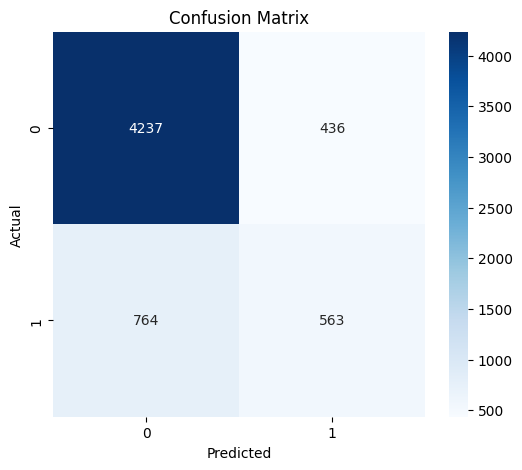

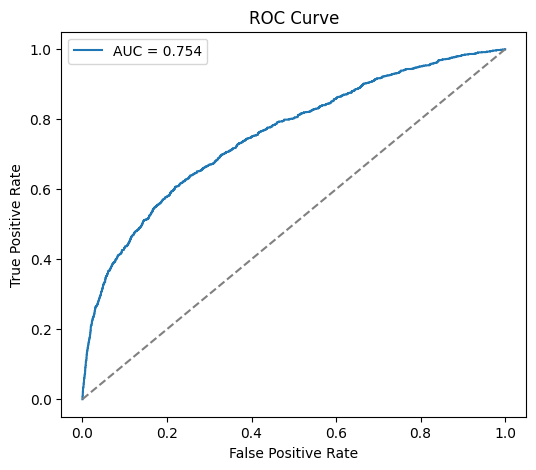

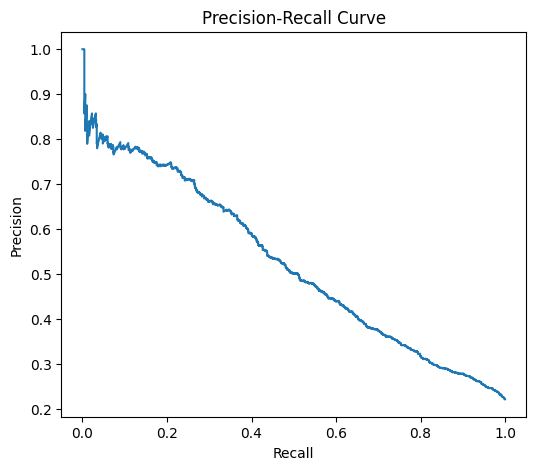

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_payment_next_month']


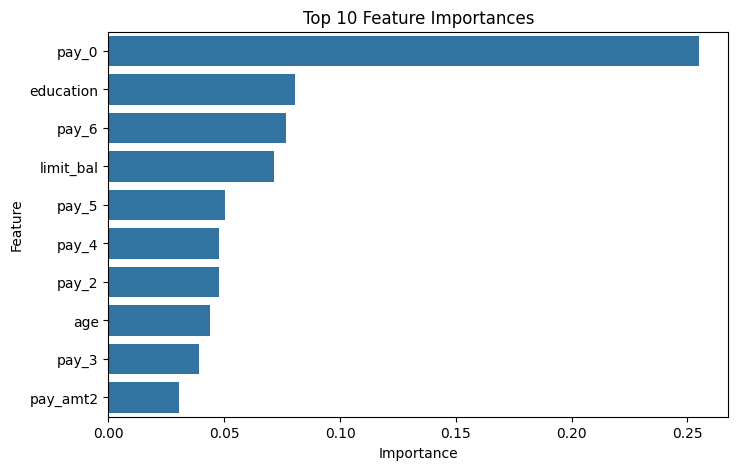

In [23]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
print("Path to dataset files:", path)
import os
file = [f for f in os.listdir(path) if f.endswith('.xls') or f.endswith('.xlsx') or f.endswith('.csv')][0]
if file.endswith('.xls') or file.endswith('.xlsx'):
    df = pd.read_excel(os.path.join(path, file), header=1)
else:
    df = pd.read_csv(os.path.join(path, file))
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']
num_cols = X.select_dtypes(include=[np.number]).columns
pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
pre = ColumnTransformer([('num', pipe, num_cols)])
X = pre.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(rec_curve, prec_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')
print(df.columns.tolist())
X = df.drop(columns=['default_payment_next_month'])
y = df['default_payment_next_month']
imp = model.feature_importances_
imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': imp
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Top 10 Feature Importances')
plt.show()

**Q3) Predict traffic congestion levels public APIs (e.g., Google Traffic, OpenTraffic) data or
real-time traffic data from city traffic sensors or open datasets.**

Q3 - Traffic congestion prediction
Accuracy: 0.9985, Precision (w): 0.9984, Recall (w): 0.9985, F1 (w): 0.9985
              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       1.00      1.00      1.00      1991

    accuracy                           1.00      2000
   macro avg       0.94      0.89      0.91      2000
weighted avg       1.00      1.00      1.00      2000



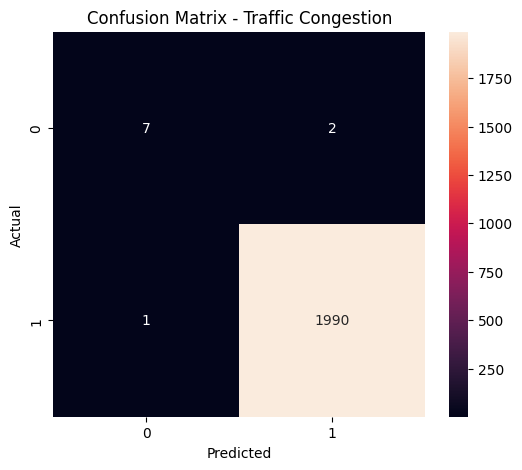

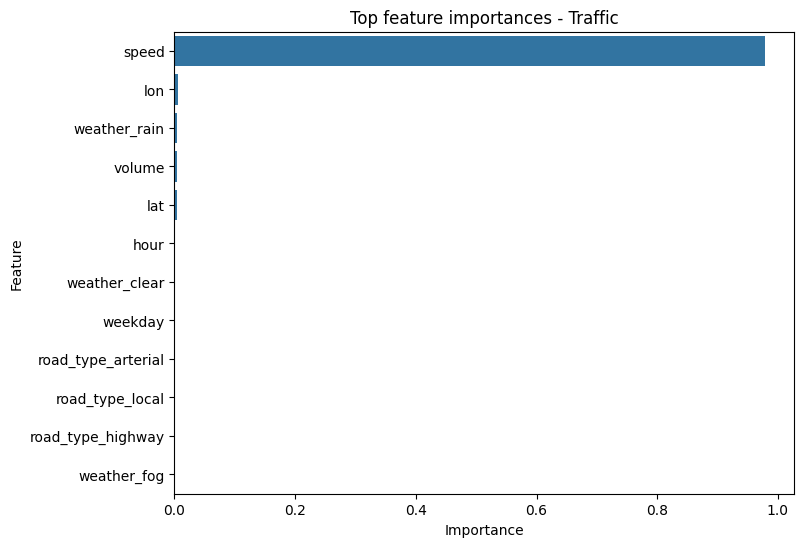

In [15]:
# Q3 - Predict traffic congestion levels
# Notes: Replace the API / dataset-loading section with your real API or CSV path.
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Data loading ----------
# Option A: load a CSV downloaded from an open dataset:
# path = "open_traffic_sample.csv"
# df = pd.read_csv(path)

# Option B: fetch from a hypothetical API (replace with real endpoint & API key)
# Example structure expected: timestamp, lat, lon, speed, volume, weather, road_type, congestion_label
# api_url = "https://api.opentraffic.example/traffic"
# params = {"bbox": "72.8,18.9,72.95,19.1", "start": "2025-10-01T00:00:00Z", "end": "2025-10-02T00:00:00Z", "apikey": "<YOUR_API_KEY>"}
# resp = requests.get(api_url, params=params)
# df = pd.DataFrame(resp.json()['data'])

# For demo / unit test, create a small synthetic dataset structure
np.random.seed(42)
n = 10000
df = pd.DataFrame({
    'timestamp': pd.date_range('2025-01-01', periods=n, freq='min'),
    'lat': np.random.uniform(12.9, 13.1, n),
    'lon': np.random.uniform(77.5, 77.7, n),
    'speed': np.random.normal(40, 15, n).clip(0, 120),
    'volume': np.random.poisson(15, n),
    'road_type': np.random.choice(['highway', 'arterial', 'local'], n),
    'weather': np.random.choice(['clear','rain','fog'], n, p=[0.8,0.15,0.05])
})
# define congestion label (0=low,1=medium,2=high) as an example
df['congestion_label'] = pd.cut( (100 - df['speed']) + df['volume']*0.5 + (df['weather']=='rain')*10,
                                 bins=[-1,10,30,300], labels=[0,1,2]).astype(int)

# ---------- Feature engineering ----------
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday

target = 'congestion_label'
X = df.drop(columns=['timestamp', target])
y = df[target]

# Separate numeric/categorical
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)])

X_processed = pre.fit_transform(X)

# Train/test split and optional oversampling for class balance
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# If classes are imbalanced, use SMOTE (works for multiclass with k_neighbors appropriate)
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# ---------- Model ----------
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_bal, y_train_bal)

# ---------- Evaluation ----------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("Q3 - Traffic congestion prediction")
print(f"Accuracy: {acc:.4f}, Precision (w): {prec:.4f}, Recall (w): {rec:.4f}, F1 (w): {f1:.4f}")
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Traffic Congestion')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

# ---------- Feature importance (requires mapping back feature names) ----------
# Get feature names from ColumnTransformer
num_features = num_cols
cat_features = list(pre.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_cols))
feature_names = num_features + cat_features
imp = model.feature_importances_
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Top feature importances - Traffic')
plt.show()

**Q4) Forecast electricity usage in smart homes. Dataset: UCI Individual Household Electric
Power Consumption dataset.**

Q4 - Electricity usage forecasting
RMSE: 0.0680, MAE: 0.0540, R2: 0.9648


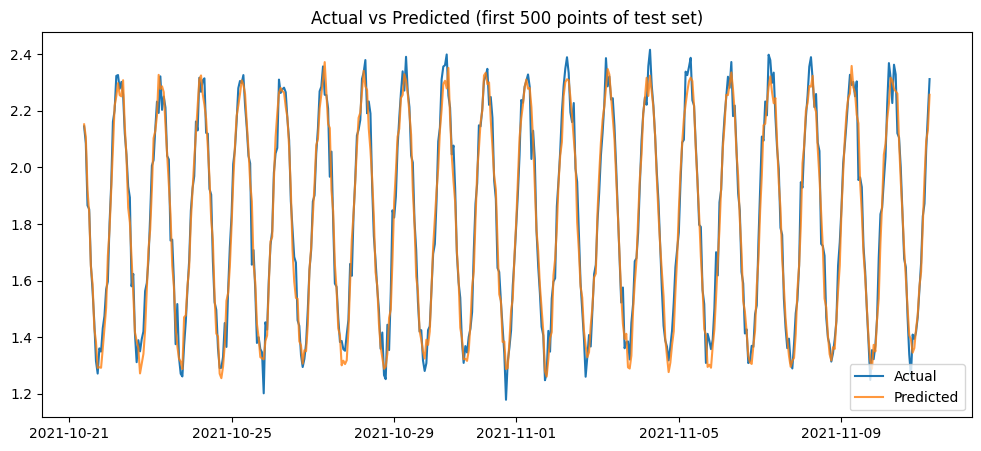

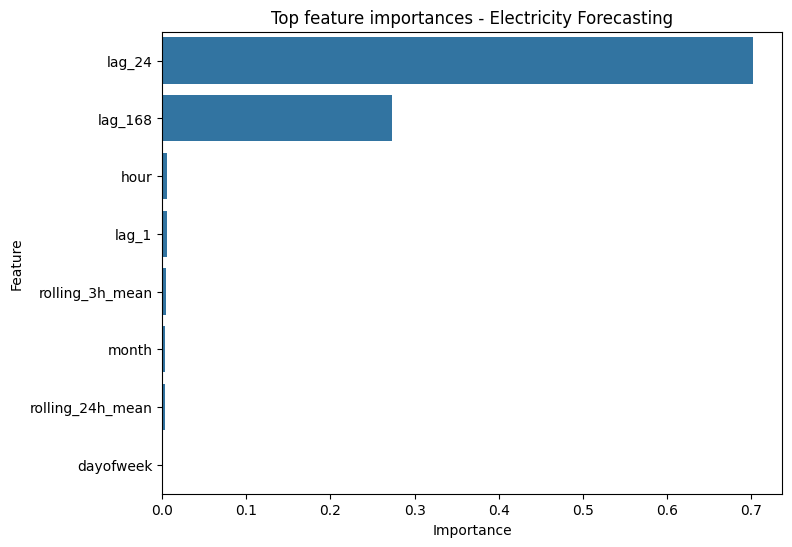

In [19]:
# Q4 - Forecast household electricity usage (time-series) using XGBoost
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Data loading ----------
# Replace path with the actual CSV (the UCI dataset is commonly 'household_power_consumption.txt' with ; delimiter)
# df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'dt':['Date','Time']}, infer_datetime_format=True, na_values=['?'])
# For demonstration, create synthetic timeseries similar structure:
rng = pd.date_range('2021-01-01', periods=24*365, freq='H')  # hourly data for a year
np.random.seed(42)
base = 0.5 + 0.5*np.sin(2*np.pi * rng.hour / 24)  # daily cycle
season = 0.2*np.sin(2*np.pi * rng.dayofyear / 365)
noise = np.random.normal(0, 0.05, len(rng))
df = pd.DataFrame({
    'datetime': rng,
    'global_active_power': np.clip(1.5 + base + season + noise, 0, None)
})
df.set_index('datetime', inplace=True)

# ---------- Feature engineering (lag features, rolling stats, time features) ----------
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

# create lags and rolling statistics
lags = [1, 24, 168]  # 1-hour, 1-day, 1-week
for l in lags:
    df[f'lag_{l}'] = df['global_active_power'].shift(l)

df['rolling_3h_mean'] = df['global_active_power'].shift(1).rolling(window=3).mean()
df['rolling_24h_mean'] = df['global_active_power'].shift(1).rolling(window=24).mean()

# drop rows with NA due to shifting
df = df.dropna()

target = 'global_active_power'
X = df.drop(columns=[target])
y = df[target]

# train/test split by time (no shuffling)
split_idx = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ---------- Model ----------
model = XGBRegressor(random_state=42, n_estimators=200)
model.fit(X_train, y_train)

# ---------- Forecasting / evaluation ----------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Q4 - Electricity usage forecasting")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(y_test.index[:500], y_test.values[:500], label='Actual')
plt.plot(y_test.index[:500], y_pred[:500], label='Predicted', alpha=0.8)
plt.legend()
plt.title('Actual vs Predicted (first 500 points of test set)')
plt.show()

# Feature importance
imp = model.feature_importances_
imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': imp}).sort_values('Importance', ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Top feature importances - Electricity Forecasting')
plt.show()

**Q5) Classify product or service reviews as positive/negative/neutral. Dataset: Amazon
Product Reviews, Yelp Dataset, or Kaggle reviews datasets.**

Q5 - Review sentiment classification
Accuracy: 0.3640, Precision (w): 0.4144, Recall (w): 0.3640, F1 (w): 0.3707
              precision    recall  f1-score   support

    negative       0.28      0.48      0.36       290
     neutral       0.21      0.19      0.20       197
    positive       0.57      0.36      0.44       513

    accuracy                           0.36      1000
   macro avg       0.35      0.35      0.33      1000
weighted avg       0.41      0.36      0.37      1000



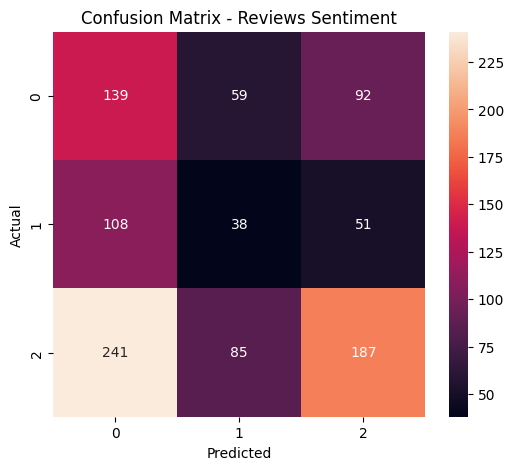


Top positive features for class 'negative':
  service (0.021)
  service quality (0.021)
  quality (0.021)
  fantastic service (0.021)
  fantastic (0.021)
  special (0.010)
  average special (0.010)
  average (0.010)
  broke use (0.008)
  broke (0.008)
  terrible (0.008)
  use (0.008)
  terrible broke (0.008)
  worth (0.007)
  money (0.007)

Top positive features for class 'neutral':
  product highly (0.050)
  recommend (0.050)
  product (0.050)
  excellent (0.050)
  highly recommend (0.050)
  highly (0.050)
  excellent product (0.050)
  worth money (0.009)
  worth (0.009)
  money (0.009)
  terrible broke (0.006)
  terrible (0.006)
  broke (0.006)
  use (0.006)
  broke use (0.006)

Top positive features for class 'positive':
  okay (0.028)
  okay item (0.028)
  does (0.028)
  item (0.028)
  item does (0.028)
  job (0.028)
  does job (0.028)
  special (0.017)
  average special (0.017)
  average (0.017)
  fantastic (0.005)
  service quality (0.005)
  service (0.005)
  quality (0.005)
  f

In [21]:
# Q5 - Sentiment classification for product/service reviews
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Data loading ----------
# Replace with actual CSV containing columns: 'review_text', 'label' (labels: 'positive','negative','neutral')
# df = pd.read_csv("amazon_reviews_sample.csv")
# For demo create synthetic text dataset:
np.random.seed(42)
texts = [
    "Excellent product, highly recommend",
    "Terrible, broke after one use",
    "Okay item, does the job",
    "Fantastic service and quality",
    "Not worth the money",
    "Average, nothing special"
]
labels = ['positive','negative','neutral']
df = pd.DataFrame({
    'review_text': np.random.choice(texts, 5000),
    'label': np.random.choice(labels, 5000, p=[0.5,0.3,0.2])
})

X = df['review_text']
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline: TF-IDF + LogisticRegression (fast baseline) - swap with CatBoostText or XGBoost on vectors if desired
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Optional resampling on vectorized data: use pipeline without resampling or apply oversampling via pipeline extension.
# As a simple path, perform oversampling on the raw features by vectorizing first:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_vec, y_train)

# Fit classifier (LogReg here)
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_res, y_train_res)

# Predictions & eval
y_pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("Q5 - Review sentiment classification")
print(f"Accuracy: {acc:.4f}, Precision (w): {prec:.4f}, Recall (w): {rec:.4f}, F1 (w): {f1:.4f}")
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Reviews Sentiment')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

# Top coefficients for each class (interpretability)
feature_names = tfidf.get_feature_names_out()
for cls, coef in zip(clf.classes_, clf.coef_):
    top_idx = np.argsort(coef)[-15:]
    top_feats = feature_names[top_idx]
    top_vals = coef[top_idx]
    print(f"\nTop positive features for class '{cls}':")
    for f, v in zip(reversed(top_feats), reversed(top_vals)):
        print(f"  {f} ({v:.3f})")
